In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline


In [2]:
anes = pd.read_csv('data/anes_pilot_2020ets_csv.csv')

In [3]:
data = anes.copy(deep = True)

In [4]:
data.drop(inplace=True, columns=[ 'votemail1b', 'V1', 'StartDate', 'EndDate', '_v1', 'RecordedDate', 
                                 'ResponseId','qmetadata_Browser', 'qmetadata_Version', '_v2', 
                                 'qmetadata_Resolution', 'check','relig1_11_TEXT', 'mauga', 'pk_cjus', 
                                 'pk_germ', 'ethnic1', 'ethnic2', 'ethnic3', 'mixed', 'hpi', 'asian', 'namer',
                                'black', 'white', 'race1_hpi', 'race1_asian', 'race1_namer', 'race1_black', 'race1_white',
                                'hispanicr', 'nonhispanic_white', 'hispanic_white', 'hispanic', 'pid2r', 'pk_index',
                                'survexp1', 'survexp2', 'dejavu', 'surv_comp', 'RAND_INC', 'XCONTACT', 'XFORGIVE', 'FEEDBACK_GROUP',
                                'INSTRUCTION_GROUP', 'form', 'serious', 'admit', 'geer1896', 'pk_sen', 'pk_spend', 'expshark',
                                'inc_cps', 'inc_cpsmod', 'marital2', 'whites_1', 'whites_2', 'whites_3',
                                'whites_4', 'whites_5', 'whites_6', 'whites_7', 'blacks_1', 'blacks_2', 'blacks_3',
                                'blacks_4', 'blacks_5', 'blacks_6', 'blacks_7', 'hisp_1', 'hisp_2', 'hisp_3',
                                'hisp_4', 'hisp_5', 'hisp_6', 'hisp_7', 'asians_1', 'asians_2', 'asians_3', 'asians_4',
                                'asians_5', 'asians_6','asians_7', 'survexp1', 'survexp2', 'dejavu', 'citizen1', 'citizen2',
                                'particip_count', 'pk_mauga_correct', 'pk_germ_correct', 'pk_cjus_correct', 'pk_sen_correct',
                                'pk_spend_correct', 'pk_cjus_correctb', 'pk_index', 'pidstr1_dr', 'pidstr1_ind', 'pidstr2_dr',
                                 'pidstr2_ind','pidstr3_dr', 'pidstr3_ind', 'pid7str', 'hispanic', 'hispanic_white', 'nonhispanic_white',
                                'hispanicr', 'race1_white', 'race1_black', 'race1_namer', 'race1_hpi', 'white', 'black',
                                'namer', 'asian', 'hpi', 'mixed'])

In [5]:
data.shape

(3080, 371)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(3078, 371)

In [8]:
#dropping the 2 covid non responses 

In [9]:
data.drop(data[data['mis_covid1'] == 9].index, inplace=True)

In [10]:
data.drop(data[data['mis_covid2'] == 9].index, inplace=True)

In [11]:
#now dealing the code from the imputing notebook

In [12]:
data_6 = ['pidstr',  'pidlean', 'pidstr1', 'pidstr2', 'pidstr3', 'relig2a',
     'att2', 'att3', 'fundmt1', 'fundmt2', 'whitejob', 'femid2_fem', 'femid2_anti',
     'femid2_nei', 'callout3a','callout3b','viol3_dems', 'viol3_reps', 'viol3_both']

In [13]:
for column in data_6:
    data[column].replace(6, np.nan, inplace=True)

In [14]:
data_9 = ['follow', 'votemail2', 'voterid1', 'voterid2', 'vote16', 'hopeful', 'worried', 'irritated', 'talk3', 
      'primaryvote', 'vote20jb', 'vote20bs', 'richpoor2', 'lcd', 'lcr', 'freemkt1a',
     'freemkt1b', 'govsize1a', 'govsize1b', 'ineqinc1a', 'antirelig1',
     'antirelig2', 'racist1','racist2', 'immignum', 'wall7', 'pathway', 
     'return', 'open', 'affact', 'hlthcare1', 'hlthcare2', 'covid1', 'covid2',
     'covid_elect', 'abort1', 'abort_imp', 'abort2', 'gayadopt', 'transmilit1a',
     'harass', 'diversity7', 'experts', 'science', 'exphelp', 'excessive',
     'compro1', 'compro2', 'pcorrect', 'selfcensor', 'childrear1', 'childrear2',
     'childrear3', 'rural2', 'rural3', 'rural4', 'conf_covid1', 'conf_covid2', 'impeach1', 'impeach2', 'pid1r', 
     'pidstr', 'pidlean', 'pidstr1', 'pidstr2', 'pidstr3', 'rr1', 'rr2',
     'rr3', 'rr4', 'relig2b', 'att1', 'att2', 'att3', 'fundmt1', 'fundmt2',
     'impact1', 'impact2', 'impact3', 'impact4', 'impact5', 'impact7', 'impact8',
     'impact9', 'whitejob', 'femid1a', 'femid1b', 'femid2_fem', 'knowtran1',
     'knowtran2_1', 'knowtran2_2', 'knowtran2_3', 'knowtran2_4', 'knowtran2_5',
     'knowtran2_6', 'knowgay1', 'knowgay2_1', 'knowgay2_2', 'knowgay2_3', 'knowgay2_4',
     'knowgay2_5', 'knowgay2_6', 'stress1', 'stress2', 'stress3', 'stress4',
     'depress1', 'depress2', 'depress3', 'depress4', 'depress5', 'callout1',
     'speech1', 'callout2', 'speech2', 'divmoral', 'forgive3', 'moralsup1',
     'duepro3', 'moralcert3', 'forgive5', 'intelsup1', 'moralcert1', 'duepro4',
     'moralcert6', 'forgive4', 'moralcert2', 'duepro1', 'callout3a','callout3b',
     'moralsup2', 'duepro2', 'intelsup2', 'duepro5', 'moralcert4', 'forgive6', 
     'moralcert5', 'link_bla','link_his', 'link_asi','link_whi', 'link_hpi', 'link_nat',
     'selfmon1', 'selfmon2', 'selfmon3', 'selfmon4', 'selfmon5', 'selfmon6', 'home_cps',
     'viol3_dems', 'viol3_reps', 'viol1', 'viol2a', 'viol2b', 'exptravel_ever', 
     'exphomesch', 'expconvert', 'expholiday', 'exparrest', 'exppubasst', 'expfight',
     'expavoid', 'callout_social', 'callout_person', 'expknowimmig', 'expbuyus',
     'expretire', 'expknowpris', 'marital1', 'home_ownership', 'vote20turnoutjb', 'pid7',
     'race7']

In [15]:
for column in data_9: 
    data[column].replace(9, np.nan, inplace=True)

In [16]:
data_77 = ['healthcarepres7', 'dtleader2', 'jbleader2', 
     'bsleader2', 'billtax2', 'guarinc2', 'freemkt2', 'freemkt3',
     'govsize2', 'govsize3', 'regulate2', 'strpres1b', 'transmilit1b',
     'freecol2', 'loans2']

In [17]:
for column in data_77: 
    data[column].replace(77, np.nan, inplace=True)

In [18]:
data_8 = ['turnout16a', 'turnout16a1', 'freemkt1a', 'freemkt1b',
     'govsize1a', 'govsize1b', 'antirelig1', 'antirelig2', 'racist1',
     'racist2', 'transmilit1a', 'pcorrect', 'selfcensor', 'relig2a',
     'femid1a', 'callout1', 'speech1', 'callout2', 'speech2', 'divmoral',
     'forgive3', 'moralsup1', 'duepro3', 'moralcert3', 'forgive5','intelsup1', 
     'moralcert1', 'duepro4', 'moralcert6', 'forgive4', 'moralcert2', 'duepro1',
     'callout3a','callout3b', 'moralsup2', 'duepro2', 'intelsup2', 'duepro5',
     'moralcert4', 'forgive6', 'moralcert5', 'home_anes', 'viol2a']

In [19]:
for column in data_8:
    data[column].replace(8, np.nan, inplace=True)

In [20]:
data_7 = ['turnout16b', 'relig2b', 'femid1b', 'stress1', 'stress2', 'stress3',
     'stress4', 'depress1', 'depress2', 'depress3', 'depress4', 'depress5', 
     'link_bla','link_his','link_asi','link_whi', 'link_hpi', 'link_nat',
     'selfmon1', 'selfmon2', 'selfmon3', 'selfmon4', 'selfmon5', 'selfmon6',
     'home_cps', 'viol2b']

In [21]:
for column in data_7:
    data[column].replace(7, np.nan, inplace=True)

In [22]:
data_99 = ['apppres7', 'frnpres7', 'immpres7', 'econpres7', 'healthcarepres7', 
     'dtcares', 'dtdignif', 'dtauth', 'dtdiv', 'dtknow', 'jbleader1',
     'jbleader2', 'jbcares', 'jbdignif', 'jbhonest', 'jbauth', 'jbdiv',
     'jbknow', 'bsleader1', 'bsleader2', 'bscares', 'bsdignif', 'bshonest',
     'bsauth', 'bsdiv', 'bsknow', 'freemkt2', 'freemkt3', 'govsize2', 'govsize3',
           'forgive1a', 'forgive1b','forgive2b','finworry', 'confecon', 'taxecon', 
     'regulate2', 'strpres1b', 'tol_rally', 'tol_pres', 'tol_teach',
     'transmilit1b', 'freecol2', 'forgive2a']

In [23]:
for column in data_99:
    data[column].replace(99, np.nan, inplace=True)

In [24]:
data_66 = ['freemkt2', 'freemkt3', 'govsize2', 'govsize3', 
     'facebook1', 'twitter1', 'forgive1a', 'forgive1b', 'forgive2a',
     'forgive2b', 'inc_anes']

In [25]:
for column in data_66: 
    data[column].replace(66, np.nan, inplace=True)

# simple imputer

In [26]:
imp=SimpleImputer(missing_values= np.nan)
data_clean = pd.DataFrame(imp.fit_transform(data))
data_clean.columns = data.columns
data_clean.index = data.index 

In [27]:
data_clean.isna().sum()

follow        0
reg1          0
votemail1a    0
votecount     0
votemail2     0
             ..
pid7          0
rr_scale      0
race7         0
vidx          0
vidknow       0
Length: 371, dtype: int64

In [28]:
data_clean.head()

,follow,reg1,votemail1a,votecount,votemail2,voterid1,voterid2,turnout16a,turnout16a1,turnout16b,...,USIPAddress,age,home_ownership,income,vote20turnoutjb,pid7,rr_scale,race7,vidx,vidknow
0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,6.0,1.23033,...,1.0,27.0,1.0,10.0,1.0,2.0,9.0,1.0,2.0,1.0
1,2.0,1.0,5.0,3.0,4.0,1.0,1.0,1.0,6.0,1.23033,...,1.0,60.0,2.0,7.0,1.0,1.0,16.0,1.0,3.0,0.0
2,2.0,4.0,4.0,3.0,3.0,1.0,1.0,2.0,6.0,1.23033,...,1.0,45.0,2.0,10.0,0.0,4.0,6.0,5.0,3.0,0.0
3,2.0,1.0,6.0,3.0,4.0,1.0,1.0,1.0,6.0,1.23033,...,1.0,65.0,2.0,1.0,1.0,1.0,13.0,1.0,3.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,6.0,1.23033,...,1.0,53.0,1.0,11.0,1.0,7.0,4.0,2.0,2.0,0.0


In [29]:
data_clean.shape

(3072, 371)

# make a target variable

In [30]:
data_clean.rename(columns={"mis_covid1": 'covid_lab'}, inplace = True)

In [31]:
data_clean.rename(columns={"mis_covid2": 'covid_vax'}, inplace = True)

In [32]:
data_clean.covid_lab.replace((2,1), (0,1), inplace=True)

In [33]:
data_clean.covid_vax.replace((2,1), (0,1), inplace=True)

In [34]:
data_clean['covid_mis_score'] = data_clean['covid_lab'] + data_clean['covid_vax']

In [35]:
data_clean.drop(inplace=True, columns=['covid_lab', 'covid_vax'])

# feature selection

In [36]:
features = data_clean.columns
traindf = pd.DataFrame(data_clean, columns=features)
y = traindf['covid_mis_score']>=1
X = traindf.copy()
del X['covid_mis_score']

In [37]:
X.head()

,follow,reg1,votemail1a,votecount,votemail2,voterid1,voterid2,turnout16a,turnout16a1,turnout16b,...,USIPAddress,age,home_ownership,income,vote20turnoutjb,pid7,rr_scale,race7,vidx,vidknow
0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,6.0,1.23033,...,1.0,27.0,1.0,10.0,1.0,2.0,9.0,1.0,2.0,1.0
1,2.0,1.0,5.0,3.0,4.0,1.0,1.0,1.0,6.0,1.23033,...,1.0,60.0,2.0,7.0,1.0,1.0,16.0,1.0,3.0,0.0
2,2.0,4.0,4.0,3.0,3.0,1.0,1.0,2.0,6.0,1.23033,...,1.0,45.0,2.0,10.0,0.0,4.0,6.0,5.0,3.0,0.0
3,2.0,1.0,6.0,3.0,4.0,1.0,1.0,1.0,6.0,1.23033,...,1.0,65.0,2.0,1.0,1.0,1.0,13.0,1.0,3.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,6.0,1.23033,...,1.0,53.0,1.0,11.0,1.0,7.0,4.0,2.0,2.0,0.0


In [38]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=100

# pearson

In [39]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

100 selected features


In [40]:
cor_feature

['racist2',
 'socmed_3',
 'childrear2',
 'diversity7',
 'protest',
 'viol3_dems',
 'pidstr3',
 'depress1',
 'meeting',
 'pidstr2',
 'pidstr1',
 'jbdiv',
 'vote20bs',
 'abort_imp',
 'stress4',
 'ftpence1',
 'expbuyus',
 'ftobama1',
 'bshonest',
 'expfight',
 'bsauth',
 'gayadopt',
 'intelsup2',
 'pathway',
 'depress4',
 'govsize1a',
 'exphelp',
 'expconvert',
 'socmed_7',
 'exppubasst',
 'rr_scale',
 'att1',
 'intelsup1',
 'compro2',
 'expknowpris',
 'impeach1',
 'knowtran2_1',
 'talk3',
 'excessive',
 'rural4',
 'rural2',
 'votemail2',
 'impact3',
 'selfmon3',
 'moralcert6',
 'lcself',
 'science',
 'childrear3',
 'covid_elect',
 'moralcert4',
 'selfmon4',
 'exparrest',
 'impact5',
 'viol2b',
 'selfmon2',
 'speech1',
 'moralcert5',
 'callout_social',
 'birthyr',
 'age',
 'talk2',
 'impact1',
 'pid7',
 'fttrump1',
 'viol2a',
 'happy',
 'impact4',
 'exphomesch',
 'viol1',
 'hopeful',
 'lcr',
 'impact6',
 'strpres1b',
 'proud',
 'fundmt1',
 'rr1',
 'impact8',
 'rr4',
 'impact9',
 'taxecon'

# chi sqaured

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [42]:
chi_feature

['votemail2',
 'voterid2',
 'hopeful',
 'happy',
 'proud',
 'meeting',
 'protest',
 'argument',
 'talk2',
 'talk3',
 'ftocasioc1',
 'fthaley1',
 'vote20jb',
 'vote20bs',
 'apppres7',
 'frnpres7',
 'immpres7',
 'econpres7',
 'healthcarepres7',
 'dtleader2',
 'dtcares',
 'dtdignif',
 'dthonest',
 'dtauth',
 'dtknow',
 'jbdignif',
 'jbdiv',
 'jbknow',
 'bscares',
 'bshonest',
 'bsauth',
 'econnow',
 'taxecon',
 'lcself',
 'lcr',
 'govsize1a',
 'strpres1b',
 'wall7',
 'pathway',
 'return',
 'hlthcare2',
 'covid_elect',
 'abort1',
 'abort_imp',
 'abort2',
 'gayadopt',
 'transmilit1a',
 'diversity7',
 'experts',
 'science',
 'excessive',
 'compro1',
 'childrear2',
 'childrear3',
 'childrear4',
 'conf_covid2',
 'impeach1',
 'impeach2',
 'pidstr1',
 'pidstr2',
 'rr1',
 'rr4',
 'att1',
 'fundmt1',
 'socmed_3',
 'socmed_6',
 'socmed_7',
 'socmed_9',
 'impact1',
 'impact3',
 'impact4',
 'impact5',
 'impact6',
 'impact8',
 'impact9',
 'whitejob',
 'knowtran2_1',
 'knowtran2_2',
 'knowtran2_3',
 'k

# recursive elimination - logistic 

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 369 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 359 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 349 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 339 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 329 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 319 features.
Fitting estimator with 309 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 299 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 289 features.
Fitting estimator with 279 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 269 features.
Fitting estimator with 259 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 249 features.
Fitting estimator with 239 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 229 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 219 features.
Fitting estimator with 209 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 199 features.
Fitting estimator with 189 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 179 features.
Fitting estimator with 169 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 159 features.
Fitting estimator with 149 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting estimator with 109 features.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10,
    verbose=5)

In [44]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


In [45]:
rfe_feature

['votemail1a',
 'votecount',
 'votemail2',
 'voterid1',
 'voterid2',
 'turnout16b',
 'hopeful',
 'outraged',
 'worried',
 'irritated',
 'talk2',
 'talk3',
 'fttrump1',
 'ftobama1',
 'ftwarren1',
 'ftbuttigieg1',
 'ftpence1',
 'ftpelosi1',
 'ftrubio1',
 'ftblack',
 'ftwhite',
 'ftfeminists',
 'fttransppl',
 'ftsocialists',
 'ftcapitalists',
 'ftdemocraticparty',
 'immpres7',
 'econpres7',
 'dtleader2',
 'jbleader1',
 'jbleader2',
 'econnow',
 'confecon',
 'taxecon',
 'lcself',
 'freemkt3',
 'govsize2',
 'govsize3',
 'regulate2',
 'strpres1a',
 'tol_pres',
 'tol_teach',
 'immignum',
 'return',
 'open',
 'abort1',
 'harass',
 'freecol1',
 'freecol2',
 'loans2',
 'experts',
 'exphelp',
 'excessive',
 'compro2',
 'selfcensor',
 'conf_covid2',
 'impeach2',
 'rr1',
 'relig2a',
 'att3',
 'socmed_1',
 'socmed_9',
 'impact3',
 'race1b_1',
 'groupid2a_lat',
 'groupid1a_bla',
 'groupid1a_asi',
 'groupid1a_hpi',
 'groupid2a_nat',
 'groupid2a_asi',
 'groupid3a_bla',
 'groupid1b_lat',
 'groupid3b_lat

# lasso 

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(), max_features=100)

In [47]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

100 selected features


In [48]:
embeded_lr_feature

['reg1',
 'votemail1a',
 'votecount',
 'votemail2',
 'voterid1',
 'voterid2',
 'turnout16a1',
 'turnout16b',
 'hopeful',
 'worried',
 'irritated',
 'talk2',
 'talk3',
 'ftobama1',
 'ftwarren1',
 'ftbuttigieg1',
 'ftpence1',
 'ftpelosi1',
 'ftrubio1',
 'fthaley1',
 'ftblack',
 'ftwhite',
 'fttransppl',
 'ftsocialists',
 'ftcapitalists',
 'ftdemocraticparty',
 'vote20jb',
 'immpres7',
 'econpres7',
 'dtleader2',
 'jbleader1',
 'jbhonest',
 'jbauth',
 'bshonest',
 'bsknow',
 'econnow',
 'confecon',
 'taxecon',
 'lcself',
 'freemkt3',
 'govsize1b',
 'govsize2',
 'govsize3',
 'regulate2',
 'tol_pres',
 'racist1',
 'immignum',
 'open',
 'abort1',
 'harass',
 'freecol2',
 'loans2',
 'experts',
 'exphelp',
 'excessive',
 'selfcensor',
 'conf_covid2',
 'impeach2',
 'relig2a',
 'impact7',
 'impact8',
 'groupid1a_bla',
 'groupid1a_asi',
 'groupid2a_nat',
 'groupid1b_lat',
 'groupid2b_bla',
 'groupid3b_whi',
 'groupid3b_bla',
 'groupid3b_asi',
 'whitejob',
 'femid2_anti',
 'knowtran2_1',
 'knowtra

# embeedeed RF


In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), max_features=100)

In [50]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

100 selected features


In [51]:
embeded_rf_feature

['votecount',
 'votemail2',
 'outraged',
 'happy',
 'talk1',
 'talk2',
 'talk3',
 'fttrump1',
 'ftobama1',
 'ftbiden1',
 'ftwarren1',
 'ftsanders1',
 'ftbuttigieg1',
 'ftharris1',
 'ftklobuchar1',
 'ftpence1',
 'ftyang1',
 'ftpelosi1',
 'ftrubio1',
 'ftocasioc1',
 'fthaley1',
 'ftthomas1',
 'ftfauci1',
 'ftblack',
 'ftwhite',
 'fthisp',
 'ftasian',
 'ftillegal',
 'ftfeminists',
 'ftmetoo',
 'fttransppl',
 'ftsocialists',
 'ftcapitalists',
 'ftbigbusiness',
 'ftlaborunions',
 'ftrepublicanparty',
 'ftdemocraticparty',
 'vote20jb',
 'apppres7',
 'frnpres7',
 'immpres7',
 'econpres7',
 'dtleader2',
 'dtcares',
 'dtdignif',
 'dthonest',
 'dtdiv',
 'jbdignif',
 'jbhonest',
 'econnow',
 'taxecon',
 'lcself',
 'lcr',
 'ineqinc1a',
 'immignum',
 'wall7',
 'return',
 'affact',
 'hlthcare1',
 'hlthcare2',
 'covid_elect',
 'abort1',
 'abort_imp',
 'abort2',
 'diversity7',
 'experts',
 'science',
 'exphelp',
 'excessive',
 'rural2',
 'rural3',
 'rural4',
 'conf_covid1',
 'conf_covid2',
 'impeach2'

# why not try them all 


In [52]:

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,whitejob,True,True,True,True,True,5
2,votemail2,True,True,True,True,True,5
3,viol1,True,True,True,True,True,5
4,taxecon,True,True,True,True,True,5
5,talk3,True,True,True,True,True,5
6,talk2,True,True,True,True,True,5
7,lcself,True,True,True,True,True,5
8,impeach2,True,True,True,True,True,5
9,immpres7,True,True,True,True,True,5
10,experts,True,True,True,True,True,5


# the best features to include..

In [53]:
# i am including the best features from the model sectors above plus demographic variables 
best_feats = data_clean[['votemail2', 'viol1', 'taxecon', 'return', 'impeach2', 'impact8', 'immpres7', 
                        'ftpence1', 'experts', 'econnow','covid_mis_score', 'conf_covid2', 'apppres7',
                        'abort1', 'age', 'sex', 'educ', 'inc_anes', 'race7', 'pid7', 'lcself']]

In [54]:
best_feats.shape

(3072, 21)

In [55]:
best_feats.head()

,votemail2,viol1,taxecon,return,impeach2,impact8,immpres7,ftpence1,experts,econnow,...,conf_covid2,apppres7,abort1,age,sex,educ,inc_anes,race7,pid7,lcself
0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,70.0,3.0,2.0,...,5.0,1.0,4.0,27.0,2.0,4.0,12.440263,1.0,2.0,4.0
1,4.0,2.0,2.0,1.0,1.0,3.0,1.0,70.0,4.0,2.0,...,4.0,2.0,4.0,60.0,2.0,4.0,7.000000,1.0,1.0,6.0
2,3.0,3.0,3.0,5.0,5.0,4.0,7.0,20.0,4.0,5.0,...,4.0,7.0,2.0,45.0,1.0,5.0,10.000000,5.0,4.0,4.0
3,4.0,4.0,3.0,1.0,1.0,5.0,1.0,80.0,4.0,5.0,...,2.0,2.0,4.0,65.0,2.0,2.0,1.000000,1.0,1.0,4.0
4,2.0,4.0,5.0,3.0,7.0,5.0,7.0,0.0,4.0,5.0,...,4.0,7.0,4.0,53.0,1.0,3.0,11.000000,2.0,7.0,4.0


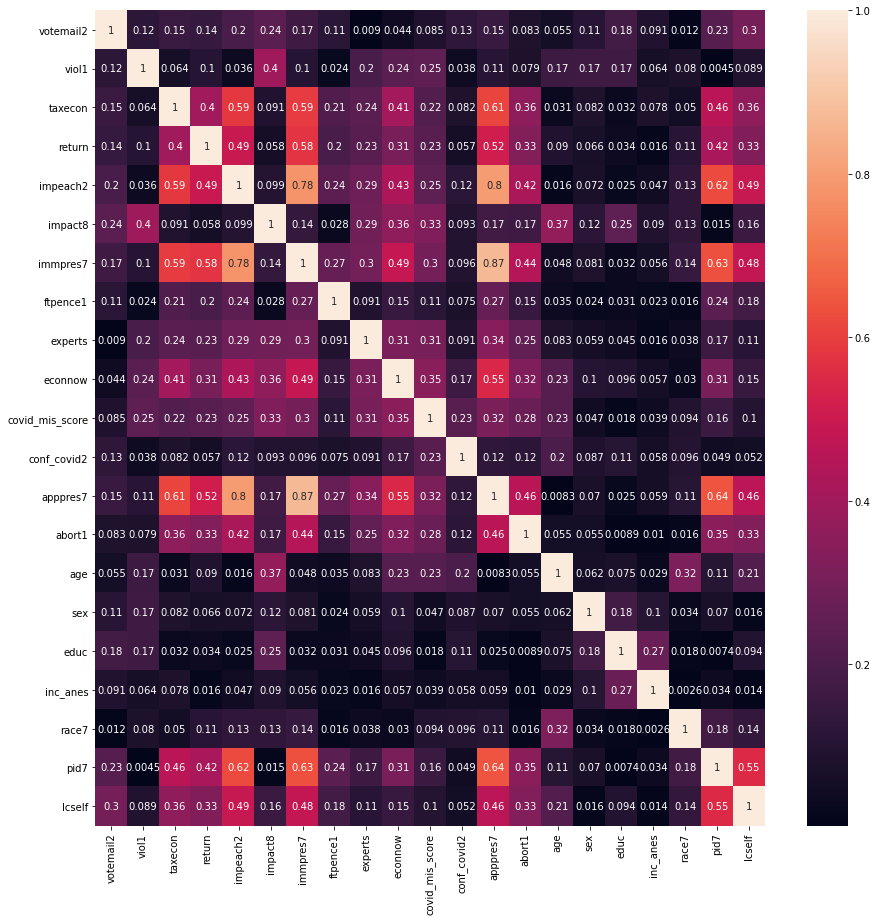

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(best_feats.corr().abs(), annot=True)
plt.show()

# dummy model!

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
X = best_feats
y = traindf['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [59]:
# Setting up Dummy Classifier for our baseline metrics
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)
dummy_model.score(X_train, y_train)

0.5217745217745218

In [60]:
cross_val_score(dummy_model, X_train, y_train, cv = 5).mean()

0.5217740466610368

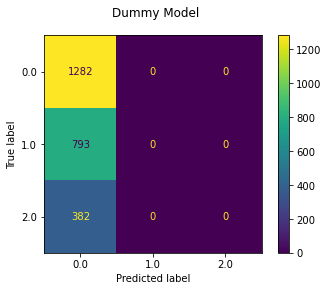

In [61]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, values_format='');

In [66]:
#accuracy, recall score, and precision score for the dummy model
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_roc_curve, plot_confusion_matrix
y_pred_dummy = dummy_model.predict(X_test)

accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy, average='micro')
precision_dummy = precision_score(y_test, y_pred_dummy, average='micro')

print(f"""
- Dummy Model - 
Accuracy score: {accuracy_dummy}
Recall score: {recall_dummy}
Precision score: {precision_dummy}
""")


- Dummy Model - 
Accuracy score: 0.4796747967479675
Recall score: 0.4796747967479675
Precision score: 0.4796747967479675



In [68]:
#scaling data for a simple logistic regression 
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

simple_log_model = LogisticRegression(random_state=42)
simple_log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [72]:
#predictions on test
y_pred = simple_log_model.predict(X_test_scaled)

#recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")

Recall score: 1.0
